# MOwNiT - laboratorium 10
## Dyskretna Transformacja Fouriera

In [14]:
import numpy as np
import itertools
import time
import matplotlib.pyplot as plt

%matplotlib notebook

## DFT
Computed as a product of Fourier Matrix and input vector. Also implementation of inverse DFT.

In [2]:
def fourier_matrix(n):
    Fn = np.empty((n,n), dtype=np.complex128)
    for i, j in itertools.product(range(n), range(n)):
        Fn[i,j] = np.exp(-2*np.pi*i*j/n * 1j)
    return Fn

def DFT(xs):
    return fourier_matrix(xs.shape[0]) @ xs

def IDFT(ys):
    conj_ys = np.conj(ys)
    n = ys.shape[0]
    return np.conj(DFT(conj_ys)/n)

In [3]:
x = np.random.randint(-100,100,64)
my_y = DFT(x)
lib_y = np.fft.fft(x)

print(f"Is IDFT(DFT(x)) close to x? {np.allclose(IDFT(my_y), x)}")
print(f"Is DFT(x) close to np.fft.fft(x)? {np.allclose(my_y, lib_y)}")

Is IDFT(DFT(x)) close to x? True
Is DFT(x) close to np.fft.fft(x)? True


## FFT
Cooley-Turkey algorithm - recursive implemenatation

In [4]:
def FFT(xs):
    n = xs.shape[0]
    if n <= 2:
        return DFT(xs)
    else:
        even_FFT = FFT(xs[::2])
        odd_FFT = FFT(xs[1::2])
        ksis = np.exp(-2*np.pi*np.arange(int(n/2))/n * 1j)
        
        return np.concatenate([even_FFT + ksis * odd_FFT, even_FFT - ksis * odd_FFT])

In [5]:
my_fft_y = FFT(x)

print(f"Is IDFT(FFT(x)) close to x? {np.allclose(IDFT(my_y), x)}")
print(f"Is FFT(x) close to np.fft.fft(x)? {np.allclose(my_y, lib_y)}")

Is IDFT(FFT(x)) close to x? True
Is FFT(x) close to np.fft.fft(x)? True


In [6]:
def ft_times(matrices):
    for matrix in matrices:
        print("--------")
        print(f"Vector of size {matrix.shape[0]}")
        start_time = time.time()
        DFT(matrix)
        end_time = time.time()
        print(f"DFT time: {end_time - start_time}s")

        start_time = time.time()
        FFT(matrix)
        end_time = time.time()
        print(f"FFT time: {end_time - start_time}s")
        
        start_time = time.time()
        np.fft.fft(matrix)
        end_time = time.time()
        print(f"np.fft.fft time: {end_time - start_time}s")

In [7]:
# TESTS
A = np.random.randint(10, 1000, 128)
B = np.random.randint(10, 1000, 1024)
C = np.random.randint(10, 1000, 4096)

test_matrices = [A, B, C]

In [8]:
ft_times(test_matrices)

--------
Vector of size 128
DFT time: 0.023207664489746094s
FFT time: 0.002897500991821289s
np.fft.fft time: 8.893013000488281e-05s
--------
Vector of size 1024
DFT time: 1.3379833698272705s
FFT time: 0.010977983474731445s
np.fft.fft time: 0.0001728534698486328s
--------
Vector of size 4096
DFT time: 20.36011552810669s
FFT time: 0.04532623291015625s
np.fft.fft time: 0.00022029876708984375s


## FFT testing
Test suite contains 5 signals with different frequencies in 2 configurations:
- Sum of signals
- Concatenation of signals

In [15]:
test_signals_f = [5,13,17,2,9]
test_sample_rate = 64
test_seconds = 8
test_N = test_seconds * test_sample_rate
test_time_samples = np.arange(test_N)/test_sample_rate

<IPython.core.display.Javascript object>


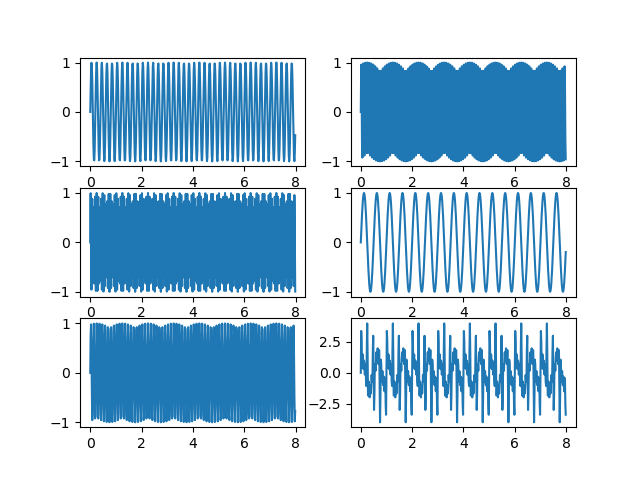

In [16]:
def signal_with_f(f,t):
    return np.sin(2*f*t*np.pi)

def signals_sum(signals_f, t):
    value = 0
    for f in signals_f:
        value += signal_with_f(f, t)
    return value


def test_sum_signal(t):
    return signals_sum(test_signals_f, t)

sum_test_signal_samples = np.array([test_sum_signal(t) for t in test_time_samples])

plt.close()
fig = plt.figure()
ax = fig.subplots(3,2).reshape(6)
for i, f in enumerate(test_signals_f):
    ax[i].plot(test_time_samples, [signal_with_f(f,t) for t in test_time_samples])

ax[5].plot(test_time_samples, sum_test_signal_samples)
plt.show()

<IPython.core.display.Javascript object>


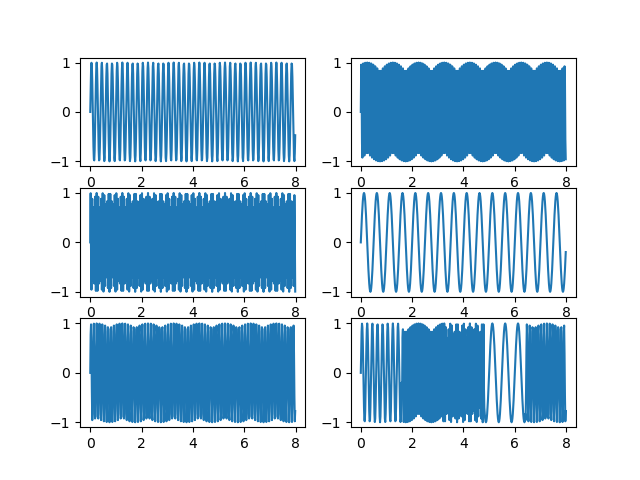

In [17]:
def signals_concat(signals_f, t, max_t=1):
    ind = int(len(signals_f)*t/max_t)
    if ind < 0 or ind >= len(signals_f):
        raise Exception("Invalid t")
    return signal_with_f(signals_f[ind], t)

def test_cat_signal(t):
    return signals_concat(test_signals_f, t, 8)

cat_test_signal_samples = np.array([test_cat_signal(t) for t in test_time_samples])

plt.close()
fig = plt.figure()
ax = fig.subplots(3,2).reshape(6)
for i, f in enumerate(test_signals_f):
    ax[i].plot(test_time_samples, [signal_with_f(f,t) for t in test_time_samples])

ax[5].plot(test_time_samples, cat_test_signal_samples)
plt.show()

## FFT plotting
Now we will plot complex FFT results for test signals 
- Blue: Real part
- Red: Imaginary part

In [18]:
def plot_fft(signal_samples, sample_rate, seconds):
    test_signal_fft = FFT(signal_samples)
    N = sample_rate * seconds
    
    plt.close()
    fig = plt.figure()
    ax1, ax2 = fig.subplots(2,1)
    ax1.plot(np.linspace(0, sample_rate, N), test_signal_fft.real)
    ax2.plot(np.linspace(0, sample_rate, N), test_signal_fft.imag, 'r-')
    plt.show()

### Signals sum

<IPython.core.display.Javascript object>


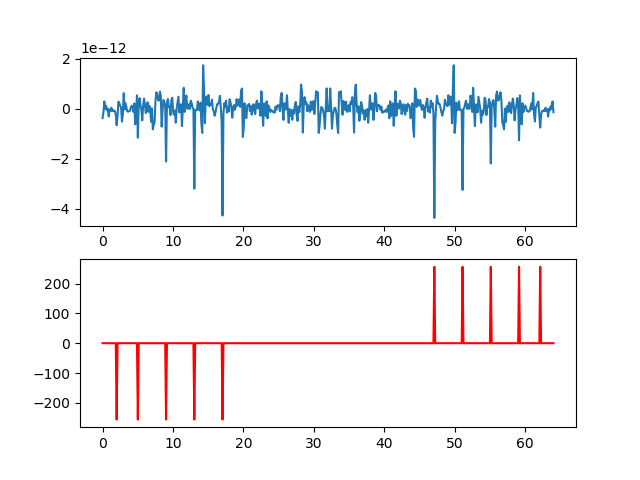

In [19]:
plot_fft(sum_test_signal_samples, test_sample_rate, test_seconds)

### Signals concatenation

<IPython.core.display.Javascript object>


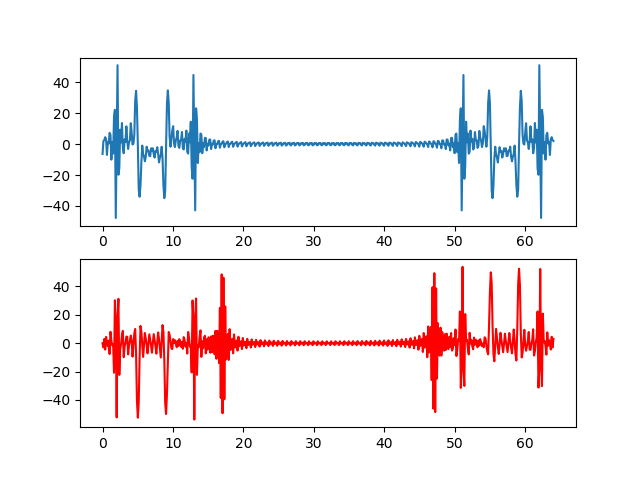

In [20]:
plot_fft(cat_test_signal_samples, test_sample_rate, test_seconds)